# Modelo de inferencia para predecir xxxx
Borrador

In [147]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, scale,minmax_scale

In [104]:
#os.setcwd()
df1=pd.read_csv("credito_mlg_mcd.csv",encoding="latin-1")
coord1=pd.read_csv("coord_muni.csv")

pd.DataFrame(df1).head

/var/folders/4z/3y0y0k_506x0t2452xb26_tr0000gn/T/ipykernel_8093/1997854955.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  coord1=pd.read_csv("coord_muni.csv")


<bound method NDFrame.head of                  sector  cve_periodo nombre_publicacion  dl_estado  \
0        BANCA MÚLTIPLE       201912            CIBanco   VERACRUZ   
1        BANCA MÚLTIPLE       201912            CIBanco   VERACRUZ   
2        BANCA MÚLTIPLE       201912            CIBanco   VERACRUZ   
3        BANCA MÚLTIPLE       201912            CIBanco   VERACRUZ   
4        BANCA MÚLTIPLE       201912            CIBanco    YUCATAN   
...                 ...          ...                ...        ...   
1134244  BANCA MÚLTIPLE       201910         Scotiabank  CHIHUAHUA   
1134245  BANCA MÚLTIPLE       201910         Scotiabank  CHIHUAHUA   
1134246  BANCA MÚLTIPLE       201910         Scotiabank  CHIHUAHUA   
1134247  BANCA MÚLTIPLE       201910         Scotiabank  CHIHUAHUA   
1134248  BANCA MÚLTIPLE       201910         Scotiabank  CHIHUAHUA   

          dl_municipio  dat_ingreso_mensual_bruto  \
0            TANTOYUCA                    6392.00   
1        TIERRA BLANCA 

In [105]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134249 entries, 0 to 1134248
Data columns (total 18 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   sector                          1134249 non-null  object 
 1   cve_periodo                     1134249 non-null  int64  
 2   nombre_publicacion              1134249 non-null  object 
 3   dl_estado                       1134248 non-null  object 
 4   dl_municipio                    1134248 non-null  object 
 5   dat_ingreso_mensual_bruto       1134249 non-null  float64
 6   dat_valor_vivienda_originacion  1134249 non-null  float64
 7   tipo_acreditado                 1134249 non-null  object 
 8   dl_tipo_comprobacion            1134249 non-null  object 
 9   dat_ai_edad_acred               1134249 non-null  int64  
 10  dl_genero                       1134249 non-null  object 
 11  numero de crédito               1134249 non-null  object 
 12  

Text(0, 0.5, 'valor de vivienda')

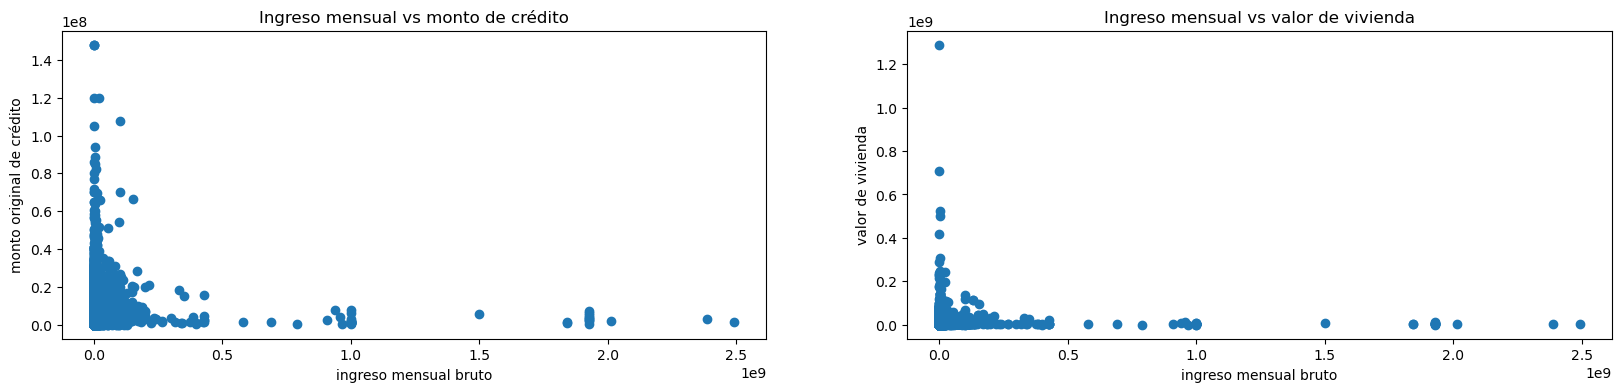

In [106]:
#
x=df1['dat_ingreso_mensual_bruto']
y1=df1['dat_monto_orig_cred']
y2=df1['dat_valor_vivienda_originacion']

plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.title('Ingreso mensual vs monto de crédito')
plt.scatter(x,y1)
plt.xlabel('ingreso mensual bruto')
plt.ylabel('monto original de crédito')

plt.subplot(1, 2, 2)
plt.title('Ingreso mensual vs valor de vivienda')
plt.scatter(x,y2)
plt.xlabel('ingreso mensual bruto')
plt.ylabel('valor de vivienda')

In [107]:
df1['cve_periodo'] = df1['cve_periodo'].astype(str)
df1['year'] = df1['cve_periodo'].str[:4].astype(int)
df1['month'] = df1['cve_periodo'].str[4:].astype(int)
df1['fecha'] = pd.to_datetime(df1[['year', 'month']].assign(day=1))
df1 = df1.drop(['cve_periodo', 'year', 'month'], axis=1)


In [108]:
df1['fecha'].describe()

/var/folders/4z/3y0y0k_506x0t2452xb26_tr0000gn/T/ipykernel_8093/3196356625.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1['fecha'].describe()


count                 1134249
unique                     50
top       2021-08-01 00:00:00
freq                    32503
first     2019-01-01 00:00:00
last      2023-02-01 00:00:00
Name: fecha, dtype: object

In [109]:
df1['tipo_acreditado'].unique()

array(['Asalariado Privado', 'Asalariado Público', 'No Asalariado'],
      dtype=object)

In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134249 entries, 0 to 1134248
Data columns (total 18 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   sector                          1134249 non-null  object        
 1   nombre_publicacion              1134249 non-null  object        
 2   dl_estado                       1134248 non-null  object        
 3   dl_municipio                    1134248 non-null  object        
 4   dat_ingreso_mensual_bruto       1134249 non-null  float64       
 5   dat_valor_vivienda_originacion  1134249 non-null  float64       
 6   tipo_acreditado                 1134249 non-null  object        
 7   dl_tipo_comprobacion            1134249 non-null  object        
 8   dat_ai_edad_acred               1134249 non-null  int64         
 9   dl_genero                       1134249 non-null  object        
 10  numero de crédito               1134249 no

### Obtención de coordenadas georgáficas

In [113]:
#!pip install unidecode
from unidecode import unidecode
n=df1.shape[0]
df1["dl_municipio"]=df1["dl_municipio"].str.lower()
df1["dl_estado"]=df1["dl_estado"].str.lower()
coord2=coord1[coord1['NOM_MUN']==coord1['NOM_LOC']]
coord2=coord2[["NOM_MUN","LAT_DEC","LON_DEC"]].rename(columns={"NOM_MUN":"dl_municipio","LAT_DEC":"latitud","LON_DEC":"longitud"})
coord2["dl_municipio"]=coord2["dl_municipio"].str.lower().apply(unidecode)
coord3=pd.merge(df1['dl_municipio'],coord2,on='dl_municipio',how='left').drop('dl_municipio',axis=1)

no todos los nombres de municipios coincidían exactamente entre la base de los datos y la base de las localizaciones, 332 municpios no fueron encontrados asociados a 300 mil filas
se quitaron acentos, mayúsculas y caracteres especiales

In [118]:
coord_na=coord3[coord3[['latitud','longitud']].isnull().all(1)]
coord_na.shape

(294672, 2)

In [119]:
df1=pd.concat([df1,coord3],axis=1)[:1134249]
df1

sector nombre_publicacion  dl_estado   dl_municipio  \
0        BANCA MÚLTIPLE            CIBanco   VERACRUZ      tantoyuca   
1        BANCA MÚLTIPLE            CIBanco   VERACRUZ  tierra blanca   
2        BANCA MÚLTIPLE            CIBanco   VERACRUZ  ursulo galvan   
3        BANCA MÚLTIPLE            CIBanco   VERACRUZ         xalapa   
4        BANCA MÚLTIPLE            CIBanco    YUCATAN      cansahcab   
...                 ...                ...        ...            ...   
1134244  BANCA MÚLTIPLE         Scotiabank  CHIHUAHUA         juarez   
1134245  BANCA MÚLTIPLE         Scotiabank  CHIHUAHUA         juarez   
1134246  BANCA MÚLTIPLE         Scotiabank  CHIHUAHUA         juarez   
1134247  BANCA MÚLTIPLE         Scotiabank  CHIHUAHUA         juarez   
1134248  BANCA MÚLTIPLE         Scotiabank  CHIHUAHUA         juarez   

         dat_ingreso_mensual_bruto  dat_valor_vivienda_originacion  \
0                          6392.00                        28033.00   
1                          8496.00                        13341.00   
2                          4533.00                        19521.00   
3                          3434.00                        14897.00   
4                          3878.00                        12291.00   
...                            ...                             ...   
1134244                   28390.00                      1600000.00   
1134245                   31665.81                      1761706.37   
1134246                   37280.40                      1347000.00   
1134247                   37741.54                      1350000.00   
1134248                   47571.78                      1225000.00   

            tipo_acreditado dl_tipo_comprobacion  dat_ai_edad_acred  \
0        Asalariado Privado           Asalariado               33.0   
1        Asalariado Privado           Asalariado               25.0   
2        Asalariado Privado           Asalariado               43.0   
3        Asalariado Privado           Asalariado               28.0   
4        Asalariado Privado           Asalariado               44.0   
...                     ...                  ...                ...   
1134244  Asalariado Privado           Asalariado               37.0   
1134245  Asalariado Privado           Asalariado               28.0   
1134246  Asalariado Privado           Asalariado               36.0   
1134247  Asalariado Privado           Asalariado               62.0   
1134248  Asalariado Privado           Asalariado               36.0   

         dl_genero numero de crédito  dat_monto_orig_cred  \
0              1.0       Crédito 760             28033.00   
1              0.0       Crédito 714             13341.00   
2              0.0       Crédito 757             19521.00   
3              1.0       Crédito 751             14897.00   
4              1.0       Crédito 976             12291.00   
...            ...               ...                  ...   
1134244        0.0       Crédito 918           1440000.00   
1134245        0.0      Crédito 1143            915629.31   
1134246        0.0       Crédito 837            810000.00   
1134247        0.0       Crédito 911           1100000.00   
1134248        0.0       Crédito 833            800000.00   

                               dl_destino_credito  \
0        Mejoras, Ampliaciones y/o Remodelaciones   
1        Mejoras, Ampliaciones y/o Remodelaciones   
2        Mejoras, Ampliaciones y/o Remodelaciones   
3        Mejoras, Ampliaciones y/o Remodelaciones   
4        Mejoras, Ampliaciones y/o Remodelaciones   
...                                           ...   
1134244             Adquisición de Vivienda Nueva   
1134245             Adquisición de Vivienda Nueva   
1134246             Adquisición de Vivienda Nueva   
1134247             Adquisición de Vivienda Nueva   
1134248             Adquisición de Vivienda Nueva   

                                   dl_producto_hipotecario  \
0                         

### Creación de variables categóricas

In [112]:
df1['dl_genero']=df1["dl_genero"]=="Femenino"
df1['dl_genero']=df1['dl_genero'].astype(int)


In [95]:
d1=['Tipo de Crédito', 'dl_segmento_vivienda', 'dl_destino_credito', 'tipo_acreditado', 'sector',
    'nombre_publicacion','dl_tipo_comprobacion','dl_producto_hipotecario']

def categoria(d1=d1):
    for i in d1:
        df1[i] = df1[i].astype("category")
        le=LabelEncoder()
        le.fit(df1[i])
        df1[i]=le.transform(df1[i])
    return df1

df1=categoria(d1) 
df1

sector  nombre_publicacion  dl_estado   dl_municipio  \
0             1                  15   VERACRUZ      tantoyuca   
1             1                  15   VERACRUZ  tierra blanca   
2             1                  15   VERACRUZ  ursulo galvan   
3             1                  15   VERACRUZ         xalapa   
4             1                  15    YUCATAN      cansahcab   
...         ...                 ...        ...            ...   
1134244       1                  27  CHIHUAHUA         juarez   
1134245       1                  27  CHIHUAHUA         juarez   
1134246       1                  27  CHIHUAHUA         juarez   
1134247       1                  27  CHIHUAHUA         juarez   
1134248       1                  27  CHIHUAHUA         juarez   

         dat_ingreso_mensual_bruto  dat_valor_vivienda_originacion  \
0                          6392.00                        28033.00   
1                          8496.00                        13341.00   
2                          4533.00                        19521.00   
3                          3434.00                        14897.00   
4                          3878.00                        12291.00   
...                            ...                             ...   
1134244                   28390.00                      1600000.00   
1134245                   31665.81                      1761706.37   
1134246                   37280.40                      1347000.00   
1134247                   37741.54                      1350000.00   
1134248                   47571.78                      1225000.00   

         tipo_acreditado  dl_tipo_comprobacion  dat_ai_edad_acred  dl_genero  \
0                      0                     0               33.0        1.0   
1                      0                     0               25.0        0.0   
2                      0                     0               43.0        0.0   
3                      0                     0               28.0        1.0   
4                      0                     0               44.0        1.0   
...                  ...                   ...                ...        ...   
1134244                0                     0               37.0        0.0   
1134245                0                     0               28.0        0.0   
1134246                0                     0               36.0        0.0   
1134247                0                     0               62.0        0.0   
1134248                0                     0               36.0        0.0   

        numero de crédito  dat_monto_orig_cred  dl_destino_credito  \
0             Crédito 760             28033.00                   8   
1             Crédito 714             13341.00                   8   
2             Crédito 757             19521.00                   8   
3             Crédito 751             14897.00                   8   
4             Crédito 976             12291.00                   8   
...                   ...                  ...                 ...   
1134244       Crédito 918           1440000.00                   2   
1134245      Crédito 1143            915629.31                   2   
1134246       Crédito 837            810000.00                   2   
1134247       Crédito 911           1100000.00                   2   
1134248       Crédito 833            800000.00                   2   

         dl_producto_hipotecario  Tipo de Crédito  dl_segmento_vivienda  \
0                            200                1                     4   
1                            200                1                     4   
2                            200                1                     4   
3                            200                1                     4   
4                            200                1                     4   
...                          ...              ...                   ...   
1134244                       14                1           

In [97]:
df1=df1.drop('numero de crédito',axis=1)

In [98]:
#poner fecha primero
cols = list(df1)
cols.insert(0, cols.pop(cols.index('fecha')))
df1 = df1.loc[:, cols]
df1

fecha  sector  nombre_publicacion   dl_municipio  \
0       2019-12-01       1                  15      tantoyuca   
1       2019-12-01       1                  15  tierra blanca   
2       2019-12-01       1                  15  ursulo galvan   
3       2019-12-01       1                  15         xalapa   
4       2019-12-01       1                  15      cansahcab   
...            ...     ...                 ...            ...   
1134244 2019-10-01       1                  27         juarez   
1134245 2019-10-01       1                  27         juarez   
1134246 2019-10-01       1                  27         juarez   
1134247 2019-10-01       1                  27         juarez   
1134248 2019-10-01       1                  27         juarez   

         dat_ingreso_mensual_bruto  dat_valor_vivienda_originacion  \
0                          6392.00                        28033.00   
1                          8496.00                        13341.00   
2                          4533.00                        19521.00   
3                          3434.00                        14897.00   
4                          3878.00                        12291.00   
...                            ...                             ...   
1134244                   28390.00                      1600000.00   
1134245                   31665.81                      1761706.37   
1134246                   37280.40                      1347000.00   
1134247                   37741.54                      1350000.00   
1134248                   47571.78                      1225000.00   

         tipo_acreditado  dl_tipo_comprobacion  dat_ai_edad_acred  dl_genero  \
0                      0                     0               33.0        1.0   
1                      0                     0               25.0        0.0   
2                      0                     0               43.0        0.0   
3                      0                     0               28.0        1.0   
4                      0                     0               44.0        1.0   
...                  ...                   ...                ...        ...   
1134244                0                     0               37.0        0.0   
1134245                0                     0               28.0        0.0   
1134246                0                     0               36.0        0.0   
1134247                0                     0               62.0        0.0   
1134248                0                     0               36.0        0.0   

         dat_monto_orig_cred  dl_destino_credito  dl_producto_hipotecario  \
0                   28033.00                   8                      200   
1                   13341.00                   8                      200   
2                   19521.00                   8                      200   
3                   14897.00                   8                      200   
4                   12291.00                   8                      200   
...                      ...                 ...                      ...   
1134244           1440000.00                   2                       14   
1134245            915629.31                   2                       14   
1134246            810000.00                   2                       14   
1134247           1100000.00                   2                       14   
1134248            800000.00                   2                       14   

         Tipo de Crédito  dl_segmento_vivienda  tasa_ponderada    latitud  \
0                      1                     4           16.50  21.351814   
1                      1                     4           16.50  21.100003   
2                      1                     4           16.50  18.447449   
3                      1                     4           16.50  19.406446   
4                      1                     4           16.50        NaN   
...                  ...                   

In [124]:
n1=df1.shape[0]
list_full={'tasa': df1['tasa_ponderada'],'t': df1['fecha'], 'n':n1,
       "mun": df1['dl_municipio'], "edad": df1["dat_ai_edad_acred"],
       "tipo": df1["Tipo de Crédito"], "genero": df1["dl_genero"],
       "valor_viv": df1['dat_valor_vivienda_originacion'],"ingreso": df1['dat_ingreso_mensual_bruto'],
       "segmento_viv": df1["dl_segmento_vivienda"], "monto_orig": df1["dat_monto_orig_cred"], 
       "destino": df1["dl_destino_credito"], "acreditado": df1["tipo_acreditado"]
       }
df1.columns

Index(['sector', 'nombre_publicacion', 'dl_estado', 'dl_municipio',
       'dat_ingreso_mensual_bruto', 'dat_valor_vivienda_originacion',
       'tipo_acreditado', 'dl_tipo_comprobacion', 'dat_ai_edad_acred',
       'dl_genero', 'numero de crédito', 'dat_monto_orig_cred',
       'dl_destino_credito', 'dl_producto_hipotecario', 'Tipo de Crédito',
       'dl_segmento_vivienda', 'tasa_ponderada', 'fecha', 'latitud',
       'longitud'],
      dtype='object')

In [125]:
list0={'tasa':df1['tasa_ponderada'], 'ingreso': df1['dat_ingreso_mensual_bruto'], 'edad': df1['dat_ai_edad_acred'],
       'valor_viv': df1['dat_valor_vivienda_originacion'], 'monto_cred': df1['dat_monto_orig_cred'],
       'destino':df1['dl_destino_credito']}

In [149]:
# normalizamos variables para que magnitudes no sesguen el modelo
df1['tasa_ponderada'] = df1['tasa_ponderada']/100
df1['dat_ingreso_mensual_bruto'] = minmax_scale(df1['dat_ingreso_mensual_bruto']) + 0.01
df1['dat_valor_vivienda_originacion'] = scale(df1['dat_valor_vivienda_originacion'])
df1['dat_monto_orig_cred'] = scale(df1['dat_monto_orig_cred'])

array([2.56323147e-06, 3.40708047e-06, 1.81764434e-06, ...,
       1.49516087e-05, 1.51365576e-05, 1.90791613e-05])